# 1. Data Importing and Cleaning:

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, auc
from xgboost import XGBClassifier
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("G:/nearest-earth-objects(1910-2024).csv/nearest-earth-objects(1910-2024).csv")
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [4]:
df.shape

(338199, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [6]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [7]:
#Check For Duplicate Values¶
df.duplicated().sum()

0

In [8]:
#Check For Missing Values¶
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [9]:
#Dealing With Missing Values
df.isnull().sum() / df.shape[0]

neo_id                    0.000000
name                      0.000000
absolute_magnitude        0.000083
estimated_diameter_min    0.000083
estimated_diameter_max    0.000083
orbiting_body             0.000000
relative_velocity         0.000000
miss_distance             0.000000
is_hazardous              0.000000
dtype: float64

In [10]:
df.fillna({
    'absolute_magnitude': df['absolute_magnitude'].mean(),
    'estimated_diameter_min': df['estimated_diameter_min'].mean(),
    'estimated_diameter_max': df['estimated_diameter_max'].mean()
}, inplace=True)

In [11]:
df.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

# 2. Exploratory Data Analysis (EDA):

In [12]:
df['is_hazardous'].value_counts()

is_hazardous
False    295037
True      43162
Name: count, dtype: int64

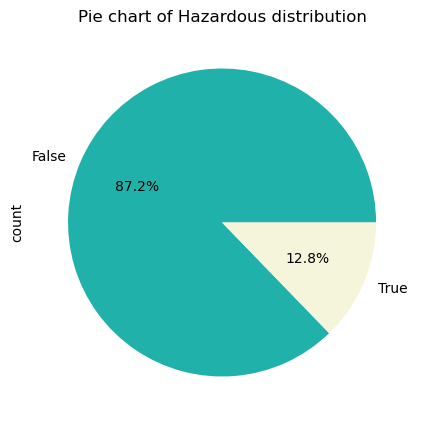

In [13]:
plt.figure(figsize=(6,5))
df['is_hazardous'].value_counts().plot(kind='pie' , autopct='%1.1f%%' , colors=['lightseagreen', 'beige'])
plt.title('Pie chart of Hazardous distribution')
plt.show()

The data is not balanced

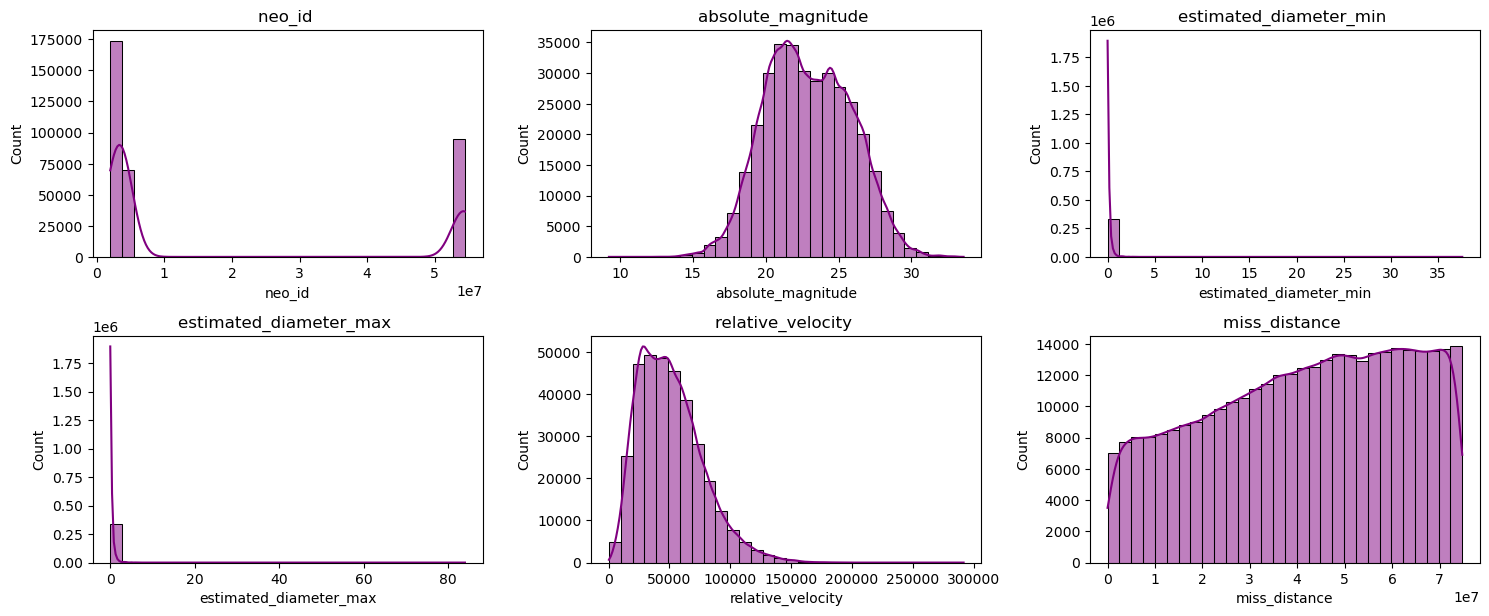

In [14]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=df, x=feature, bins=30, kde=True ,color="purple")
    plt.title(f'{feature} ')
plt.tight_layout()

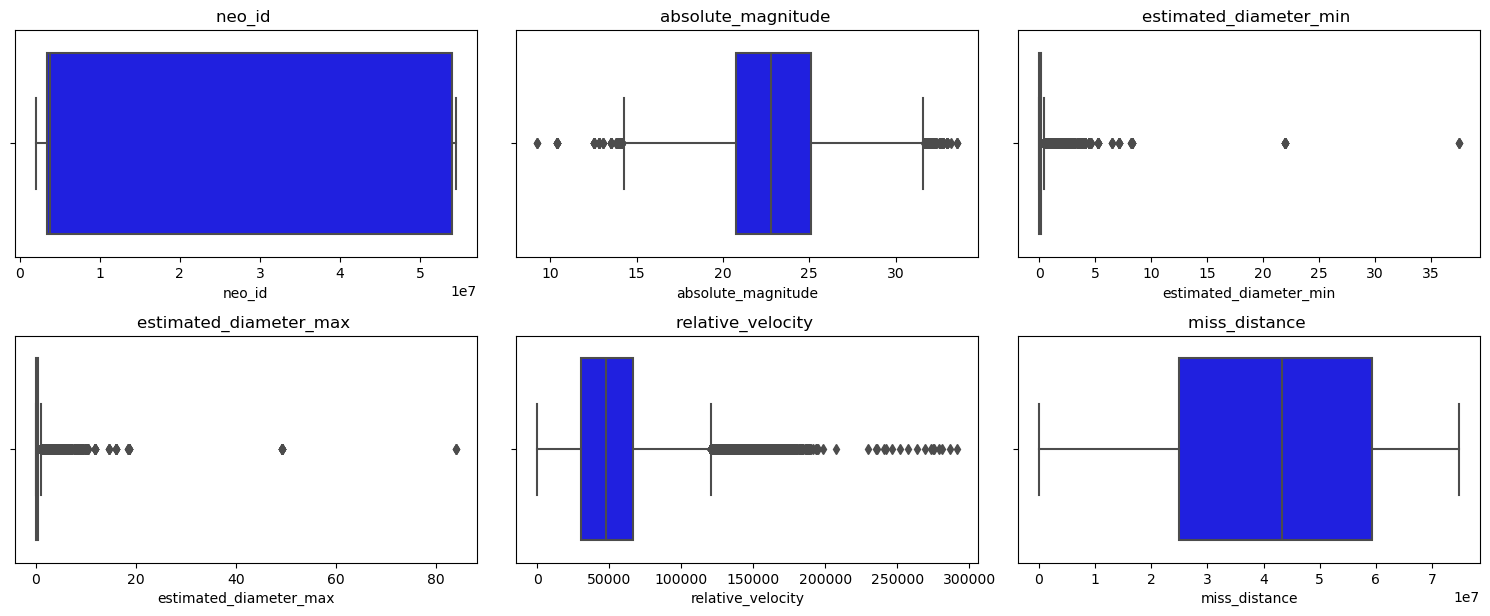

In [15]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=df, x=feature ,color="blue")
    plt.title(f'{feature} ')
plt.tight_layout()

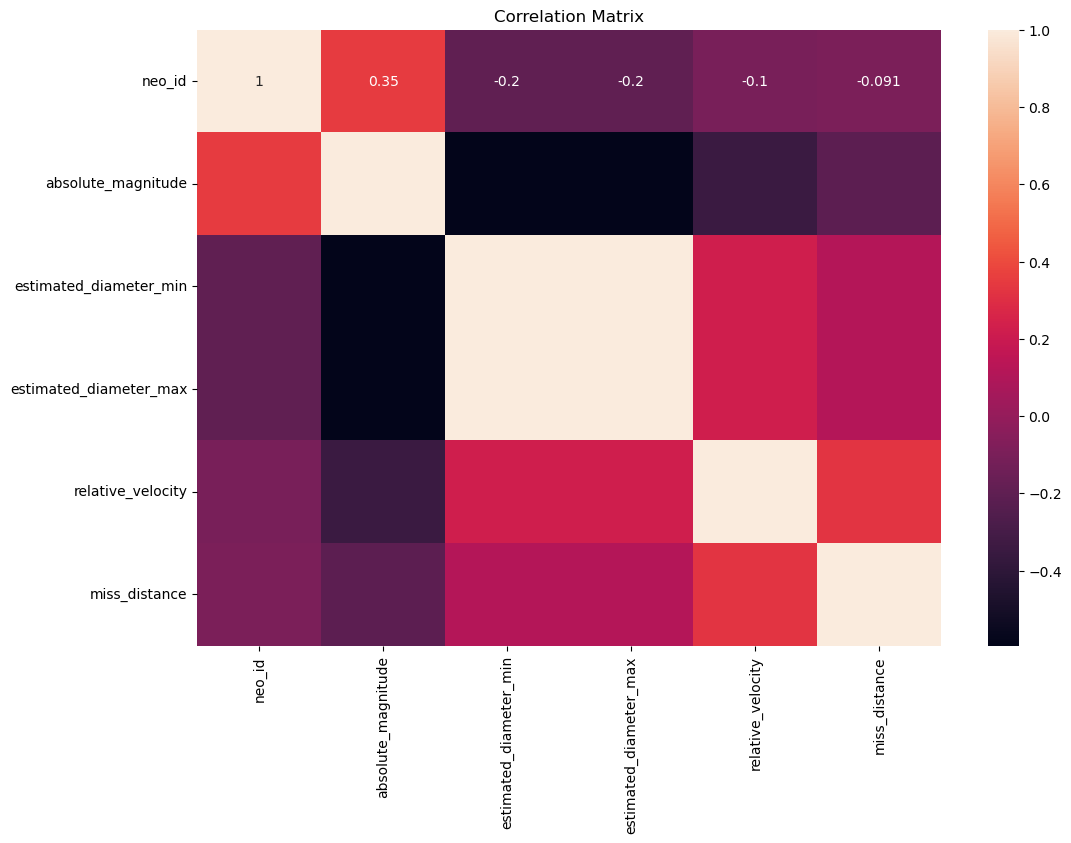

In [16]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include='number').corr()

sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

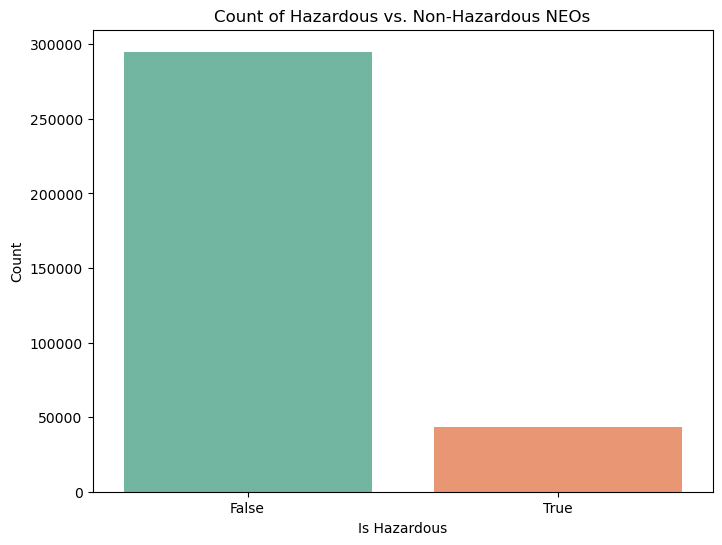

is_hazardous
False    295037
True      43162
Name: count, dtype: int64


In [17]:
# Proportion of Hazardous vs. Non-Hazardous NEOs
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_hazardous', palette='Set2')
plt.title('Count of Hazardous vs. Non-Hazardous NEOs')
plt.xlabel('Is Hazardous')
plt.ylabel('Count')
plt.show()

print(df['is_hazardous'].value_counts())

The "is_hazardous" target column is likely imbalanced, with far fewer hazardous objects compared to non-hazardous ones, So we should handle this imbalance data

# 3. Data Preprocessing:

## 1. Encoding Categorical Variables

In [18]:
categorical_features = df.select_dtypes(include=['object', 'category','bool']).columns.tolist()
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['name', 'orbiting_body', 'is_hazardous']
Numerical Features: ['neo_id', 'absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']


In [19]:
label_encoding = LabelEncoder()
for col in categorical_features:
    df[col] = label_encoding.fit_transform(df[col])

In [20]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,30603,19.14,0.394962,0.883161,0,71745.401048,5.814362e+07,0
1,2349507,31395,18.50,0.530341,1.185878,0,109949.757148,5.580105e+07,1
2,2455415,32118,21.45,0.136319,0.304818,0,24865.506798,6.720689e+07,0
3,3132126,736,20.63,0.198863,0.444672,0,78890.076805,3.039644e+07,0
4,3557844,4880,22.70,0.076658,0.171412,0,56036.519484,6.311863e+07,0


## 2. Feature Selection

In [21]:
correlation_matrix = df.corr()
print(correlation_matrix['is_hazardous'].sort_values(ascending=False))

is_hazardous              1.000000
relative_velocity         0.187021
estimated_diameter_min    0.164840
estimated_diameter_max    0.164840
name                      0.120058
miss_distance            -0.006540
neo_id                   -0.156748
absolute_magnitude       -0.343994
orbiting_body                  NaN
Name: is_hazardous, dtype: float64


We found that name, neo_id, orbiting_body don't have a significant impact on the target, So I will drop them.

In [22]:
df = df.drop(columns=['name', 'neo_id', 'orbiting_body', ])
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0


## 3. Scaling Numerical Features

In [23]:
numerical_features = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 
                       'relative_velocity', 'miss_distance']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,-1.302784,0.755562,0.755562,0.783537,0.799476,0
1,-1.522633,1.186882,1.186882,2.230715,0.686711,1
2,-0.509268,-0.068479,-0.068479,-0.992271,1.235756,0
3,-0.790949,0.130790,0.130790,1.054176,-0.536196,0
4,-0.079876,-0.258559,-0.258559,0.188485,1.038958,0
...,...,...,...,...,...,...
338194,1.939985,-0.486506,-0.486506,0.211610,1.084537,0
338195,1.977772,-0.487310,-0.487310,-1.133742,-0.579886,0
338196,-0.348160,-0.152844,-0.152844,-1.485978,0.574057,0
338197,0.327875,-0.361407,-0.361407,0.194617,-1.749816,0


## 4. Handling Imbalanced Classes Using SMOTE

In [24]:
X = df.drop(columns=['is_hazardous'])
y = df['is_hazardous']

In [25]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'Original y distribution: {y.value_counts()}')
print(f'Resampled y distribution: {pd.Series(y_resampled).value_counts()}')


Original y distribution: is_hazardous
0    295037
1     43162
Name: count, dtype: int64
Resampled y distribution: is_hazardous
0    295037
1    295037
Name: count, dtype: int64


## 5. Split the Data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. Model Training and Evaluation:

#### 1. Random Forest

In [27]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
RF.score(X_train, y_train)

0.9999894081036481

In [47]:
y_pred = RF.predict(X_test)
y_proba = RF.predict_proba(X_test)[:, 1]

In [54]:
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)

# Print confusion matrix and classification report for detailed analysis
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.95
Precision: 0.94
Recall: 0.96
F1-Score: 0.95
ROC-AUC Score: 0.99

Confusion Matrix:
 [[55642  3540]
 [ 2143 56690]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     59182
           1       0.94      0.96      0.95     58833

    accuracy                           0.95    118015
   macro avg       0.95      0.95      0.95    118015
weighted avg       0.95      0.95      0.95    118015



#### 2. XGBoost

In [50]:
XGB = XGBClassifier(n_estimators=1000, learning_rate=0.1)
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
XGB.score(X_train,y_train)

0.8879525652513774

In [53]:
y_pred_xgb = XGB.predict(X_test)
y_proba_xgb = XGB.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost Precision: {precision_xgb:.2f}")
print(f"XGBoost Recall: {recall_xgb:.2f}")
print(f"XGBoost F1-Score: {f1_xgb:.2f}")
print(f"XGBoost ROC-AUC Score: {roc_auc_xgb:.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.88
XGBoost Precision: 0.82
XGBoost Recall: 0.97
XGBoost F1-Score: 0.89
XGBoost ROC-AUC Score: 0.95

Confusion Matrix:
 [[46703 12479]
 [ 1938 56895]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87     59182
           1       0.82      0.97      0.89     58833

    accuracy                           0.88    118015
   macro avg       0.89      0.88      0.88    118015
weighted avg       0.89      0.88      0.88    118015



#### 3. Light GBM

In [41]:
lgbm = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.1)
lgbm.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 236204, number of negative: 235855
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 472059, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500370 -> initscore=0.001479
[LightGBM] [Info] Start training from score 0.001479


LGBMClassifier(n_estimators=1000)

In [42]:
lgbm.score(X_train,y_train)

0.8833980498200437

In [56]:
y_pred_lgb = lgbm.predict(X_test)
y_proba_lgb = lgbm.predict_proba(X_test)[:, 1]
# Evaluate the performance
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_proba_lgb)

print(f"LightGBM Accuracy: {accuracy_lgb:.2f}")
print(f"LightGBM Precision: {precision_lgb:.2f}")
print(f"LightGBM Recall: {recall_lgb:.2f}")
print(f"LightGBM F1-Score: {f1_lgb:.2f}")
print(f"LightGBM ROC-AUC Score: {roc_auc_lgb:.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))

LightGBM Accuracy: 0.87
LightGBM Precision: 0.81
LightGBM Recall: 0.97
LightGBM F1-Score: 0.88
LightGBM ROC-AUC Score: 0.95

Confusion Matrix:
 [[45768 13414]
 [ 1556 57277]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.77      0.86     59182
           1       0.81      0.97      0.88     58833

    accuracy                           0.87    118015
   macro avg       0.89      0.87      0.87    118015
weighted avg       0.89      0.87      0.87    118015

